<a href="https://colab.research.google.com/github/user10068/ChatGPT-Next-Web/blob/main/CostFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
url = "https://raw.githubusercontent.com/GrandmaCan/ML/main/Resgression/Salary_Data.csv" 
data = pd.read_csv(url)
data
#用数学方式表示    薪资和年资的关系   y = w*x + b y = salaty  x = YearsExperience 
x = data['YearsExperience']    # 年资
y = data['Salary']

In [ ]:
w = 10
b = 0 
y_pred = w * x +  b 
cost = (y - y_pred) **2
cost.sum() / len(x)

602.547878787879

In [ ]:
def computer_cost(x,y,w,b):
  y_pred = w * x + b 
  cost = (y - y_pred)**2
  cost = cost.sum() / len (x)
  return cost

In [ ]:
computer_cost(x,y,10,0)

602.547878787879

In [ ]:
# b=0 ,w =-100~100,cost 值
costs = []
for w in range(-100,101):
  cost = computer_cost(x,y,w,0)
  costs.append(cost)
costs

In [ ]:
import matplotlib.pyplot as plt
#plt.scatter(range(-100,101),costs)
plt.plot(range(-100,101),costs)
plt.title("costfunction")
plt.xlabel("w")
plt.ylabel("cost")

plt.show()

In [ ]:
import numpy as np
ws = np.arange(-100,101)
bs = np.arange(-100,101)
costs = np.zeros((201,201))
i = 0 
for w in ws:
  j = 0
  for b in bs:
    cost = computer_cost(x,y,w,b)
    costs[i,j] = cost
    j += 1
  i += 1

costs


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


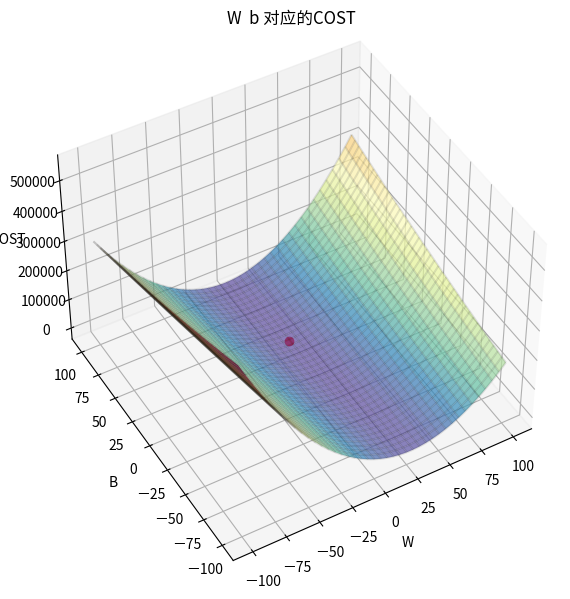

当w=[9],b=[29]会有最小的cost:[32.69484848]


In [56]:
!pip install wget
import wget
wget.download("https://github.com/GrandmaCan/ML/raw/main/Resgression/ChineseFont.ttf")
import matplotlib as mlp 
from matplotlib.font_manager  import fontManager
fontManager.addfont("ChineseFont.ttf")
mlp.rc("font",family="ChineseFont")
plt.figure(figsize=(7,7))
ax = plt.axes(projection="3d")
ax.view_init(45,-120)  #旋转角度，上下和 左右，直接输入度数 
ax.xaxis.set_pane_color = (0,0,0)
ax.yaxis.set_pane_color = (0,0,0)
ax.zaxis.set_pane_color = (0,0,0)
b_grid, w_grid = np.meshgrid(bs, ws)
ax.plot_surface(w_grid, b_grid,costs,cmap="Spectral_r",alpha = 0.7)
ax.plot_wireframe(w_grid,b_grid,costs,color="black",alpha = 0.1)
ax.set_title("W  b 对应的COST")
ax.set_xlabel("W")
ax.set_ylabel("B")
ax.set_zlabel('COST')

w_index,b_index = np.where(costs == np.min(costs))
ax.scatter(ws[w_index] ,bs[b_index], costs[w_index,b_index],color="red",s=36)
plt.show()
print(f"当w={ws[w_index]},b={bs[b_index]}会有最小的cost:{costs[w_index,b_index]}")
